In [245]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [246]:
ds = pd.read_csv(r"C:\Users\user\Downloads\titanic.csv")

In [247]:
ds.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [248]:
pd.crosstab(ds["Embarked"], ds["Survived"])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [249]:
ds.drop(["Name","Ticket", "Cabin"],axis= 1, inplace= True)

In [250]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [251]:
ds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [252]:
ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [253]:
ds["Age"].fillna(ds["Age"].mean(), inplace= True)
ds["Embarked"].fillna(ds["Embarked"].mode()[0], inplace= True)

In [254]:
ds.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

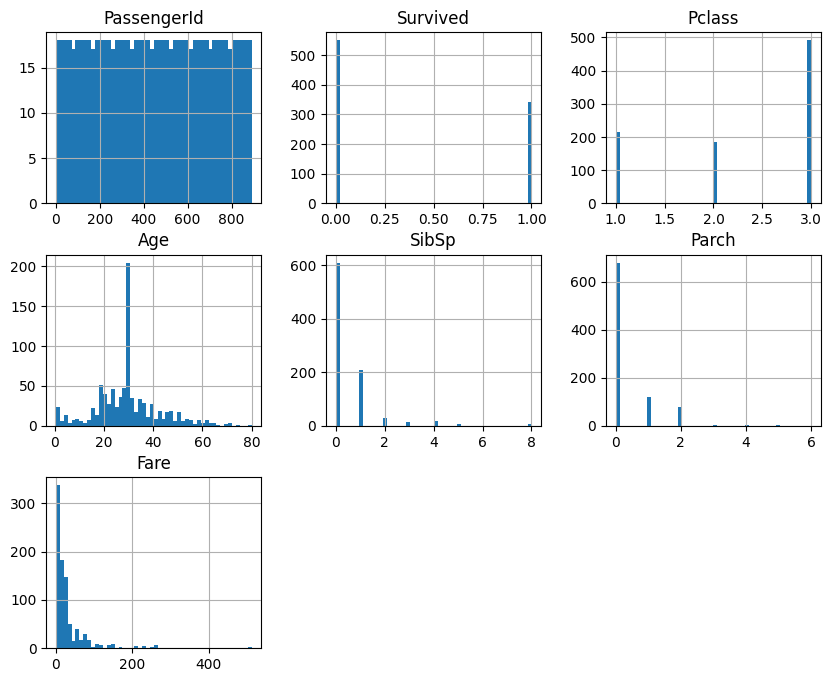

In [255]:
ds.hist(bins=50, figsize= (10, 8))

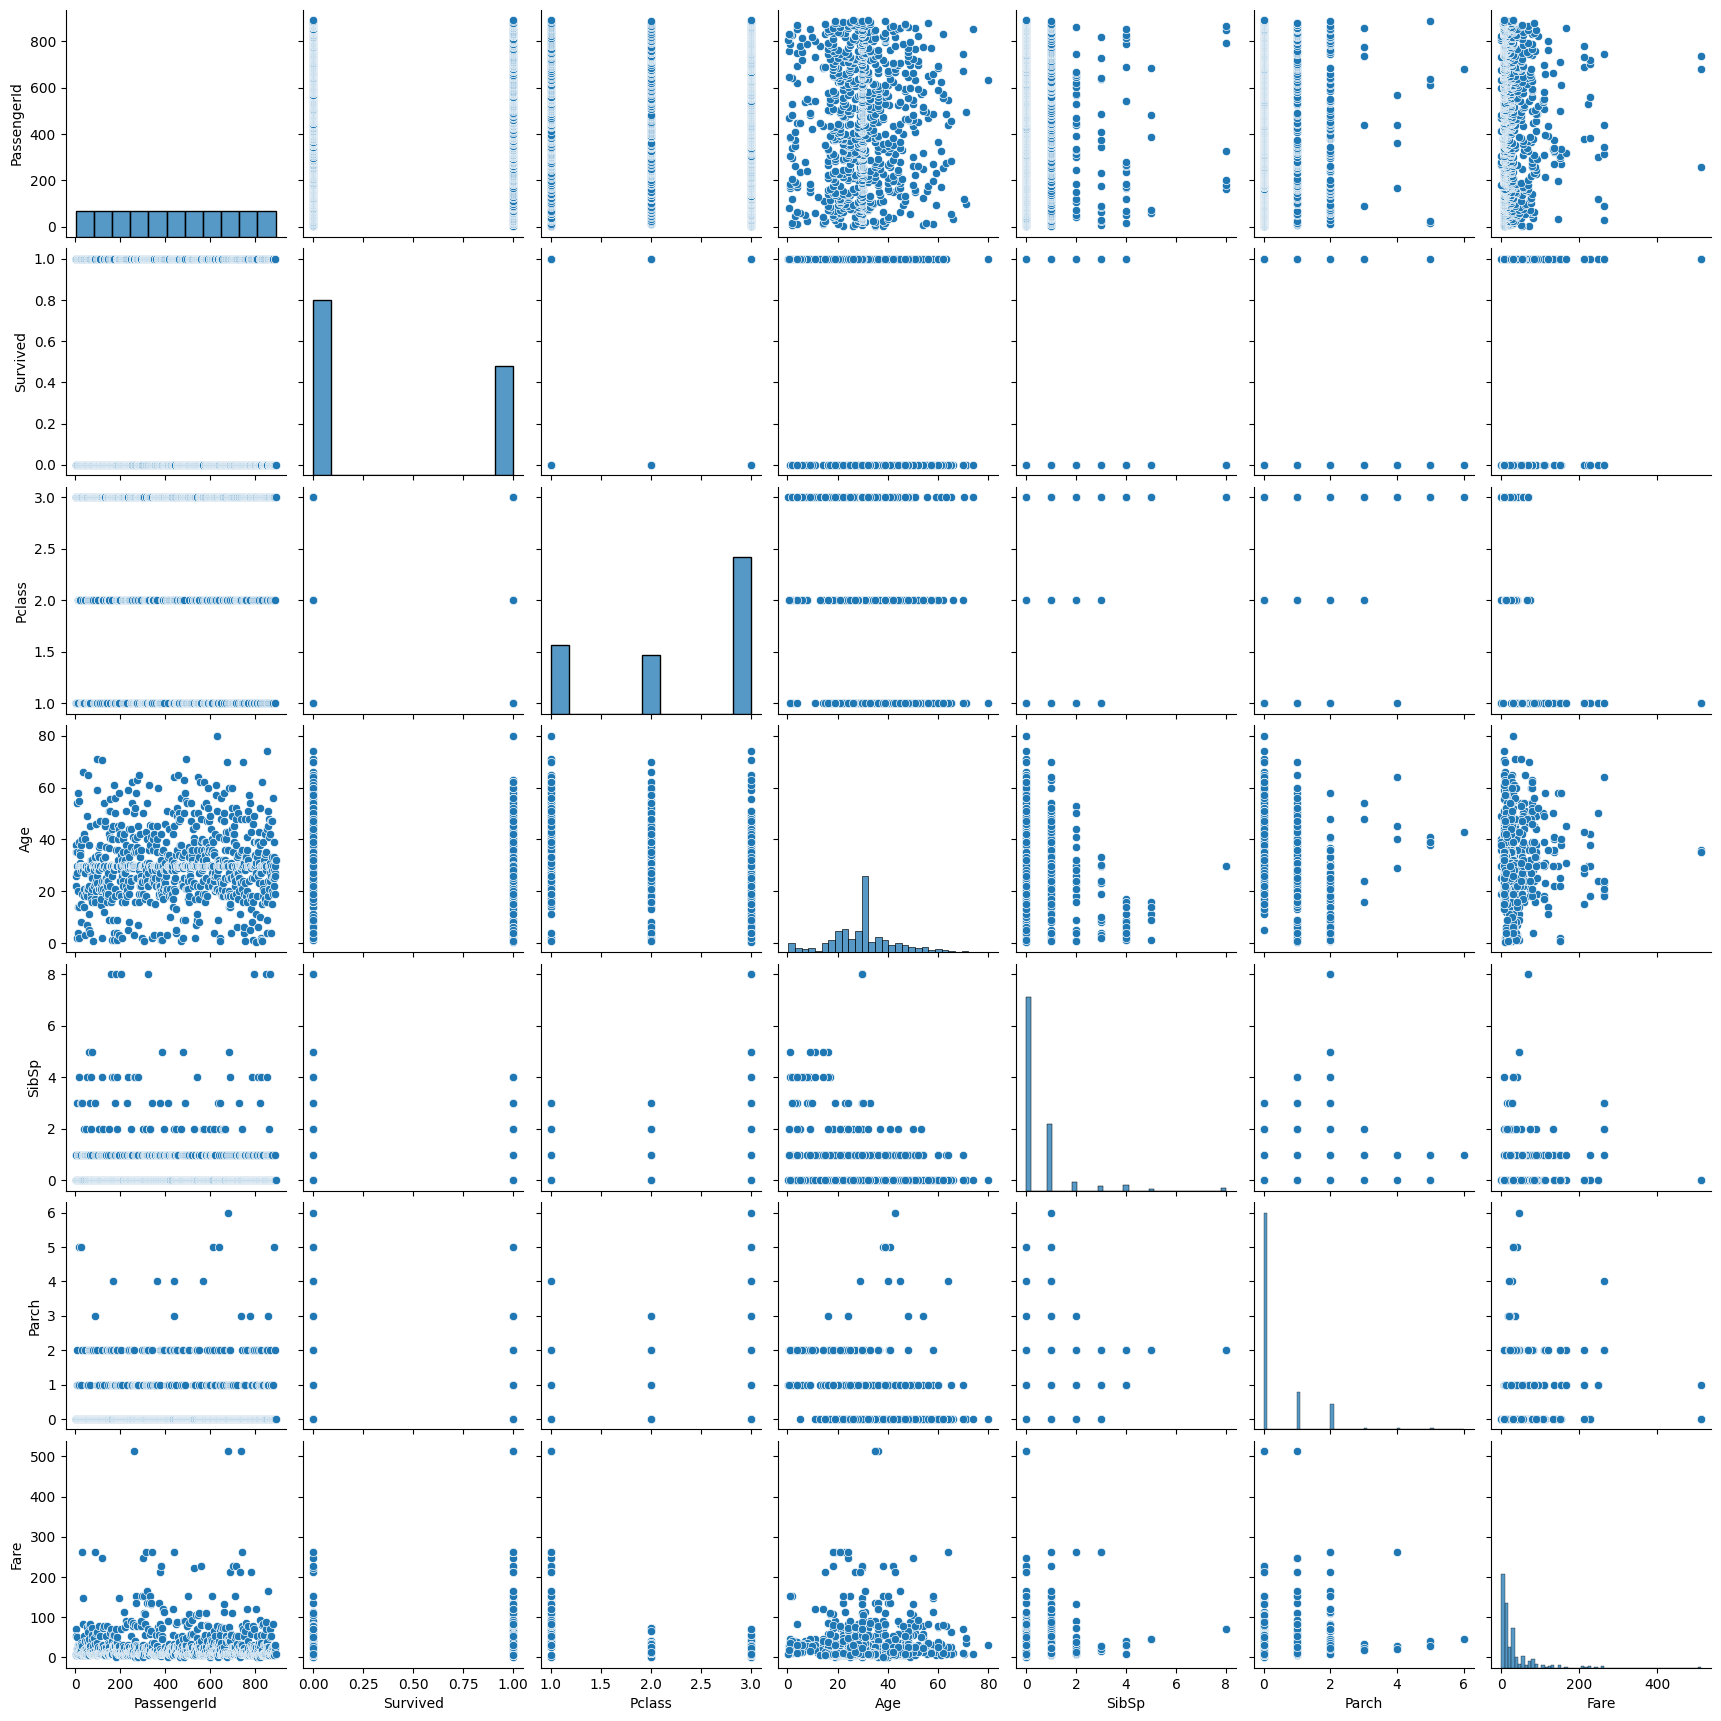

In [256]:
sns.pairplot(ds)

<Axes: ylabel='Fare'>

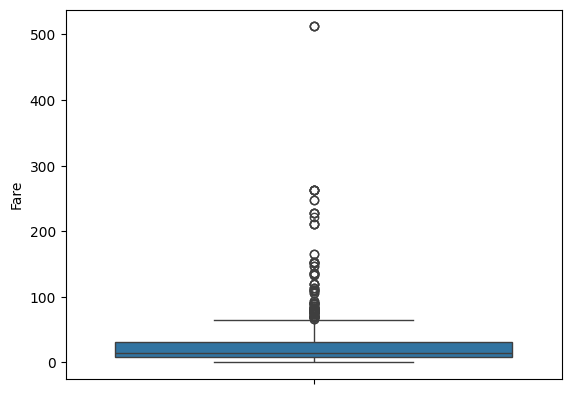

In [257]:
sns.boxplot(ds["Fare"])

In [258]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
ds["Sex"] = la.fit_transform(ds["Sex"])

In [259]:
from sklearn.preprocessing import OneHotEncoder
ds = pd.get_dummies(ds, columns=["Embarked"], drop_first= True)
ds = ds.astype(int)

In [260]:
ds.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,1,22,1,0,7,0,1
1,2,1,1,0,38,1,0,71,0,0
2,3,1,3,0,26,0,0,7,0,1


In [261]:
q1 = ds["Fare"].quantile(0.25)
q3 = ds["Fare"].quantile(0.75)

iqr = q3 - q1

min_range = q1 - 1.5 * iqr
max_range = q3 + 1.5 * iqr

ds = ds[ds["Fare"]<= max_range]

<Axes: ylabel='Fare'>

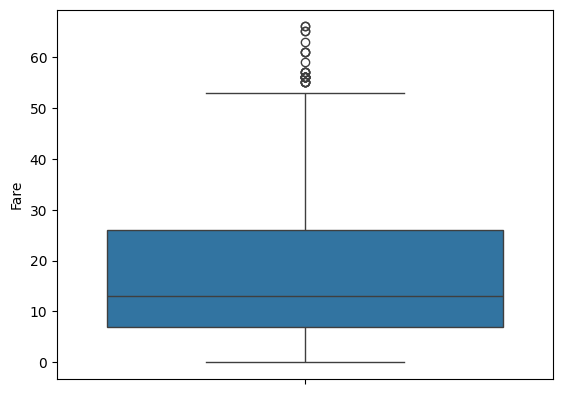

In [262]:
sns.boxplot(ds["Fare"])

In [263]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  777 non-null    int64
 1   Survived     777 non-null    int64
 2   Pclass       777 non-null    int64
 3   Sex          777 non-null    int64
 4   Age          777 non-null    int64
 5   SibSp        777 non-null    int64
 6   Parch        777 non-null    int64
 7   Fare         777 non-null    int64
 8   Embarked_Q   777 non-null    int64
 9   Embarked_S   777 non-null    int64
dtypes: int64(10)
memory usage: 66.8 KB


In [264]:
x = ds.drop("Survived", axis = 1)
y = ds["Survived"]

In [265]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x ,  y, test_size= 0.2, random_state= 42)

In [266]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x=st.fit_transform(x)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rd = RandomForestClassifier()
rd.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [268]:
rd.score(x_train, y_train), rd.score(x_test, y_test)

(0.9549114331723028, 0.8525641025641025)

In [269]:
from sklearn. linear_model import LogisticRegression
lo = LogisticRegression(max_iter= 1000, class_weight= "balanced")
lo.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [270]:
lo.score(x_train, y_train), lo.score(x_test, y_test)

(0.782608695652174, 0.8012820512820513)

In [275]:
para = {
    "n_estimators":[100],
    "criterion":['gini', 'entropy', 'log_loss'],
    "max_depth": [7],
    "min_samples_split":[2],
    "min_samples_leaf": [1]

    


}

In [277]:
from sklearn.model_selection import GridSearchCV
gr = GridSearchCV(RandomForestClassifier(), param_grid= para)
gr.fit(x_train, y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [7], 'min_samples_leaf': [1], 'min_samples_split': [2], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [279]:
gr.score(x_train, y_train), gr.score(x_test, y_test)

(0.893719806763285, 0.8589743589743589)

In [296]:
from sklearn.metrics import accuracy_score , classification_report
y_pred = gr.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       103
           1       0.90      0.66      0.76        53

    accuracy                           0.86       156
   macro avg       0.87      0.81      0.83       156
weighted avg       0.86      0.86      0.85       156



In [297]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[99,  4],
       [18, 35]])

In [298]:
import pandas as pd

compare = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

compare.head(50)

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,1,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0
